# REGRESSION...

QUES.1

ANS; Simple Linear Regression is a statistical method used to study the relationship between two variables:

Independent variable (X) → also called predictor or input.

Dependent variable (Y) → also called response or output.

QUES.2

ANS; 🔑 Key Assumptions of Simple Linear Regression

Linearity

The relationship between the independent variable (X) and dependent variable (Y) is linear.

Example: If study hours double, marks should roughly double (not curve-shaped).

Independence of Errors

The residuals (errors) should be independent of each other.

No correlation between errors.

Homoscedasticity (Constant variance)

The residuals should have constant variance at all levels of X.

(Spread of errors should remain equal across predictions).

Normality of Errors

The residuals (ε) should be approximately normally distributed.

Helps in making valid statistical inferences (like hypothesis testing).

No (or little) Multicollinearity



QUES.3

ANS; 🔹 What is Heteroscedasticity?

In regression, heteroscedasticity occurs when the variance of the error terms (residuals) is not constant across all levels of the independent variable (X).

Simply: the spread of residuals increases or decreases as X changes.

🔹 Why is it Important?

Violates Regression Assumptions

One key assumption of linear regression is constant variance of errors (homoscedasticity).

Heteroscedasticity breaks this assumption.

Leads to Inefficient Estimates

Coefficients (β₀, β₁) remain unbiased, but the standard errors become unreliable.

This can make hypothesis tests (t-test, F-test) invalid.

QUES.4

ANS;🔹 What is Multiple Linear Regression (MLR)?

Multiple Linear Regression is an extension of simple linear regression.

Instead of one independent variable (X), it uses two or more independent variables (X₁, X₂, …, Xn) to predict the dependent variable (Y).

QUES.5

ANS;🔹 What is Polynomial Regression?

Polynomial Regression is a type of regression where the relationship between the independent variable (X) and dependent variable (Y) is modeled as an nth degree polynomial.

Instead of fitting a straight line, it can fit a curve.

| Aspect             | Linear Regression                           | Polynomial Regression                       |
| ------------------ | ------------------------------------------- | ------------------------------------------- |
| **Equation**       | $Y = β₀ + β₁X + ε$                          | $Y = β₀ + β₁X + β₂X^2 + … + βnX^n + ε$      |
| **Shape of curve** | Straight line                               | Curve (parabolic, cubic, etc.)              |
| **Flexibility**    | Limited, only linear relationships          | More flexible, captures non-linear patterns |
| **Complexity**     | Simple, easy to interpret                   | More complex, risk of overfitting           |
| **Use case**       | When relationship between X and Y is linear | When data shows non-linear trends           |


QUES.6

ANS;

Intercept (β₀): 0.17999999999999794
Slope (β₁): 1.9800000000000004
Regression Equation: Y = 0.17999999999999794 + 1.9800000000000004 * X


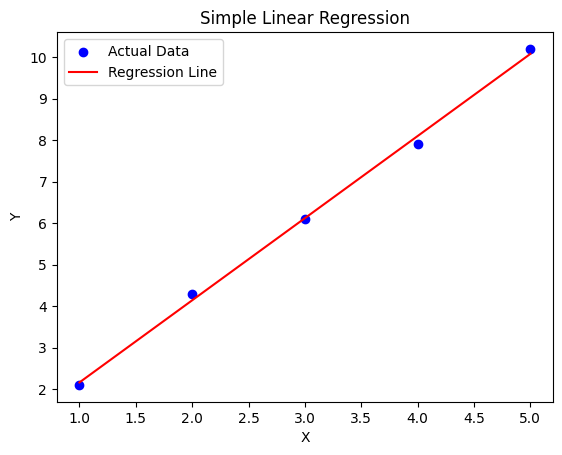

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("Intercept (β₀):", intercept)
print("Slope (β₁):", slope)
print("Regression Equation: Y =", intercept, "+", slope, "* X")

# Visualization
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


QUES.7

ANS;

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Combine predictors into DataFrame
X = pd.DataFrame({"Area": Area, "Rooms": Rooms})
Y = np.array(Price)

# Fit regression model
model = LinearRegression()
model.fit(X, Y)

print("Intercept (β₀):", model.intercept_)
print("Coefficients (β for Area, Rooms):", model.coef_)
print(f"Equation: Price = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Area) + ({model.coef_[1]:.2f} * Rooms)")

# ----- Check Multicollinearity using VIF -----
# Add constant term for VIF calculation
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept (β₀): 103157.89473684214
Coefficients (β for Area, Rooms): [   63.15789474 34736.84210526]
Equation: Price = 103157.89 + (63.16 * Area) + (34736.84 * Rooms)

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


QUES.8

ANS;

Intercept (β₀): 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]
Equation: Y = 0.06 + (1.94 * X) + (0.20 * X²)


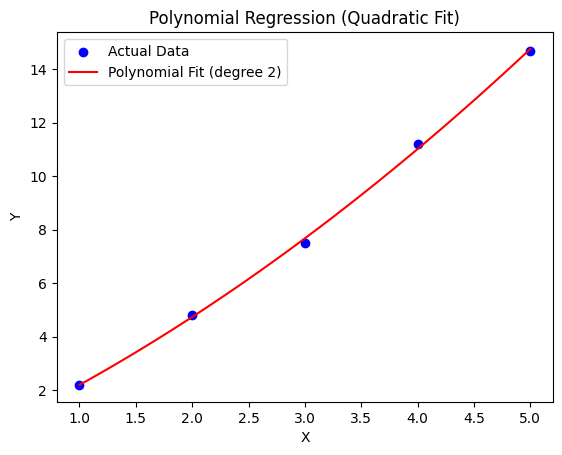

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
X_range = np.linspace(1, 5, 100).reshape(-1, 1)  # smooth curve
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (β₀):", intercept)
print("Coefficients:", coefficients)
print(f"Equation: Y = {intercept:.2f} + ({coefficients[1]:.2f} * X) + ({coefficients[2]:.2f} * X²)")

# Plot
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X_range, Y_pred, color="red", label="Polynomial Fit (degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Quadratic Fit)")
plt.legend()
plt.show()


QUES.9

ANS;

Intercept (β₀): 6.499999999999993
Slope (β₁): 1.1500000000000001
Equation: Y = 6.50 + (1.15 * X)


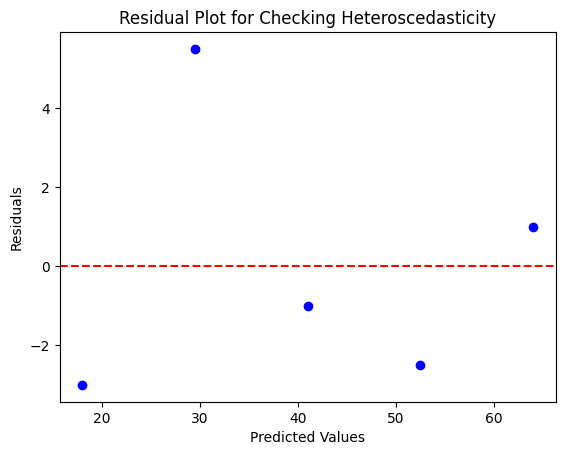

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Print regression equation
print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])
print(f"Equation: Y = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * X)")

# Residuals plot
plt.scatter(Y_pred, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Checking Heteroscedasticity")
plt.show()


QUES.10

ANS;🔹 Steps to Address Heteroscedasticity

Visual + Statistical Check

Plot residuals vs predicted values.

Run statistical tests (e.g., Breusch–Pagan, White’s test).

Transform Target Variable

Apply log, square-root, or Box-Cox transform on Price (Y).

Example:

log
⁡
(
𝑃
𝑟
𝑖
𝑐
𝑒
)
=
𝛽
0
+
𝛽
1
⋅
𝐴
𝑟
𝑒
𝑎
+
𝛽
2
⋅
𝑅
𝑜
𝑜
𝑚
𝑠
+
…
log(Price)=β
0
	​

+β
1
	​

⋅Area+β
2
	​

⋅Rooms+…

Weighted Least Squares (WLS)

Give lower weight to points with higher variance.

Robust Standard Errors

Use Huber-White robust errors so inference (p-values, CI) remains valid even with heteroscedasticity.

🔹 Steps to Address Multicollinearity

Detect

Compute correlation matrix of predictors.

Calculate VIF (Variance Inflation Factor) → VIF > 10 = problematic.

Solutions

Remove one of the correlated predictors (e.g., drop rooms if highly correlated with area).

Combine correlated variables → create new features (e.g., price per sq. ft).

Dimensionality reduction → PCA (Principal Component Analysis).

Regularization techniques →

Ridge Regression (L2): shrinks coefficients but keeps all features.

Lasso Regression (L1): performs feature selection by pushing some coefficients to zero.

🔹 Final Robust Modeling Strategy

Preprocessing: Standardize/normalize features.

Feature Engineering: Remove or combine highly correlated predictors.

Transformations: Log-transform target (Price) to stabilize variance.

Model Choice: Try Ridge/Lasso Regression instead of plain OLS.

Validation: Use cross-validation to ensure generalizability.



# THANK YOU ASSIGNMENT COMPLETED..